In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

##
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

Internet Movie Database : 출연진 정보, 개봉정보, 영화 후기, 평점 등

In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
# 학습셋과 테스트셋 지정
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

클래스 (긍정 / 부정) : 원-핫 인코딩 과정이 불필요

In [ ]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 38s 130ms/step - loss: 0.5558 - accuracy: 0.6807 - val_loss: 0.3673 - val_accuracy: 0.8376
Epoch 2/5
250/250 [==============================] - 32s 127ms/step - loss: 0.2920 - accuracy: 0.8798 - val_loss: 0.3335 - val_accuracy: 0.8556
Epoch 3/5
250/250 [==============================] - 30s 119ms/step - loss: 0.2423 - accuracy: 0.8998 - val_loss: 0.3248 - val_accuracy: 0.8597
Epoch 4/5
250/250 [==============================] - 29s 118ms/step - loss: 0.1998 - accuracy: 0.9222 - val_loss: 0.3274 - val_accuracy: 0.8563
Epoch 5/5
250/250 [==============================] - 30s 120ms/step - loss: 0.1701 - accuracy: 0.9392 - val_loss: 0.3495 - val_accuracy: 0.8552


In [ ]:
# 테스트 정확도
print("\n Test Accurary: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 9s 11ms/step - loss: 0.3495 - accuracy: 0.8552

 Test Accurary: 0.8552


In [ ]:
# 테스트셋 오차
y_vloss = history.history['val_loss']
# 학습셋 오차
y_loss = history.history['loss']

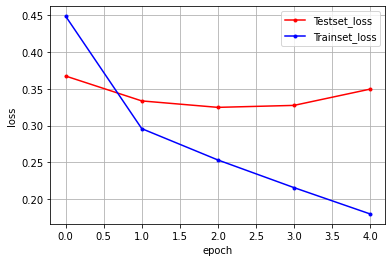

In [ ]:
# 그래프 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그리드 추가, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()